<a href="https://colab.research.google.com/github/anyfish/machine_learning_plt/blob/main/%5B8%5D_Evaluacion_de_la_red_neuronal_convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

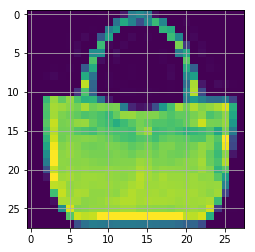

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


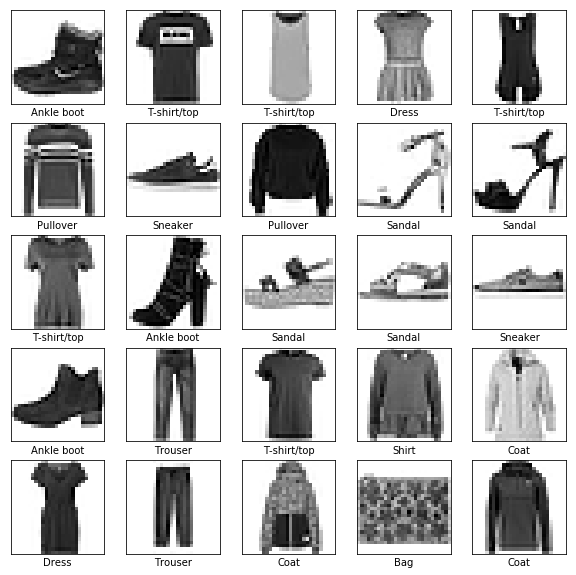

In [ ]:
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5004 - acc: 0.8235
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3758 - acc: 0.8633
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3379 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3130 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2965 - acc: 0.8905


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3564 - acc: 0.8697
Accuracy  0.8697


In [ ]:
predictions = model.predict(test_images)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


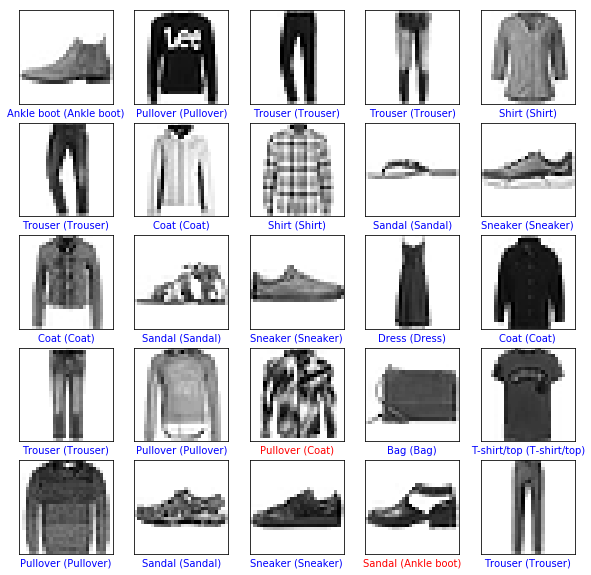

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)